# <span style="color:red">**Projet Tinder**</span>

    1.Import des librairies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.io as pio
#pio.renderers.default = "vscode"
# If you are on the workspaces:
pio.renderers.default = "iframe_connected"
# Favorise l'affichage
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('max_row', None)

    Project

L'équipe marketing a besoin d'aide pour un nouveau projet. Elle constate une baisse du nombre de rencontres et <span style="color:red">**cherche à comprendre ce qui pousse les gens à s'intéresser l'un à l'autre**</span>.
Ils ont décidé de mener une expérience de speed dating avec des personnes qui devaient donner à Tinder un grand nombre d'informations sur elles-mêmes qui pourraient finalement se refléter dans leur profil de rencontre sur l'application.
Tinder a ensuite recueilli les données de cette expérience. Chaque ligne de l'ensemble de données représente un speed dating entre deux personnes, et indique si chacune d'entre elles a secrètement accepté d'aller à un second rendez-vous avec l'autre personne.

    2.Import dataset

In [12]:
df = pd.read_csv("https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv", encoding='cp1252')
df.head(10)
#option d'ouververture si fichier déjà enregisté dans mon dossier df = pd.read_csv("Speed+Dating+Data.csv", encoding='latin1')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(8378, 195)

In [17]:
df.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

In [27]:
df['condtn'].value_counts()

2    6944
1    1434
Name: condtn, dtype: int64

In [15]:
df.describe(include='all').transpose

<bound method DataFrame.transpose of                 iid           id       gender          idg       condtn  \
count   8378.000000  8377.000000  8378.000000  8378.000000  8378.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     283.675937     8.960248     0.500597    17.327166     1.828837   
std      158.583367     5.491329     0.500029    10.940735     0.376673   
min        1.000000     1.000000     0.000000     1.000000     1.000000   
25%      154.000000     4.000000     0.000000     8.000000     2.000000   
50%      281.000000     8.000000     1.000000    16.000000     2.000000   
75%      407.000000    13.000000     1.000000    26.000000     2.000000   
max      552.000000    22.000000     1.000000    44.000000     2.000000   

               wave        round     position     positin1    

    Séparartion des datasets by "Wave"

In [ ]:
#6	March 26th ‘03	1-10 scale 
#7	March 26th ‘03  	1-10 scale  
#8	April 2nd ‘03  	1-10 scale
#9	April 2nd ‘03  	1-10 scale


In [28]:
df['wave'].value_counts()

21    968
11    882
9     800
14    720
15    684
4     648
2     608
7     512
19    450
12    392
17    280
3     200
8     200
1     200
5     190
13    180
10    162
16     96
20     84
18     72
6      50
Name: wave, dtype: int64

We will split the column wave in 2 group A and B

In [34]:
df['wave_split'] = df['wave'] .apply(
    lambda x : "A" if (x > 5 and x < 10)
    else "B" )

In [35]:
df['wave_split'].value_counts()

B    6816
A    1562
Name: wave_split, dtype: int64

In [ ]:
# 'gender' , 'age' ,'field_cd' ,'race' ,'imprace','imprelig' ,'from', 'goal' ,'date', 'career_c' ,'sports', 'tvsports', 'exercise', 'dining', 'museums',
'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
'movies', 'concerts', 'music', 'shopping', 'yoga'

In [54]:
df['gender'].value_counts()

1    4194
0    4184
Name: gender, dtype: int64

In [77]:
df1 = df[['gender', 'age' ,'field_cd' ,'race' ,'imprace','imprelig' ,'from', 'goal' ,'date', 'wave_split','attr1_1', 
          'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1','shar1_1']]
df1.head(10)


,gender,age,field_cd,race,imprace,imprelig,from,goal,date,wave_split,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
1,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
2,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
3,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
4,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
5,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
6,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
7,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
8,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
9,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0


In [78]:
df1.shape

(8378, 16)

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      8378 non-null   int64  
 1   age         8283 non-null   float64
 2   field_cd    8296 non-null   float64
 3   race        8315 non-null   float64
 4   imprace     8299 non-null   float64
 5   imprelig    8299 non-null   float64
 6   from        8299 non-null   object 
 7   goal        8299 non-null   float64
 8   date        8281 non-null   float64
 9   wave_split  8378 non-null   object 
 10  attr1_1     8299 non-null   float64
 11  sinc1_1     8299 non-null   float64
 12  intel1_1    8299 non-null   float64
 13  fun1_1      8289 non-null   float64
 14  amb1_1      8279 non-null   float64
 15  shar1_1     8257 non-null   float64
dtypes: float64(13), int64(1), object(2)
memory usage: 1.0+ MB


In [80]:
df1.describe(include='all')

,gender,age,field_cd,race,imprace,imprelig,from,goal,date,wave_split,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,8378.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299,8299.000000,8281.000000,8378,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,269,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,522,NaN,NaN,6816,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.500597,26.358928,7.662488,2.757186,3.784793,3.651645,NaN,2.122063,5.006762,NaN,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111
std,0.500029,3.566763,3.758935,1.230905,2.845708,2.805237,NaN,1.407181,1.444531,NaN,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154
min,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,NaN,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,5.000000,2.000000,1.000000,1.000000,NaN,1.000000,4.000000,NaN,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000
50%,1.000000,26.000000,8.000000,2.000000,3.000000,3.000000,NaN,2.000000,5.000000,NaN,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000
75%,1.000000,28.000000,10.000000,4.000000,6.000000,6.000000,NaN,2.000000,6.000000,NaN,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000


In [82]:
cols= df1['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']

plt.figure()
fig = (df1, x='gender' , y=cols)

SyntaxError: invalid syntax (597350652.py, line 4)

c:\Users\CHAFFA Michèle\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

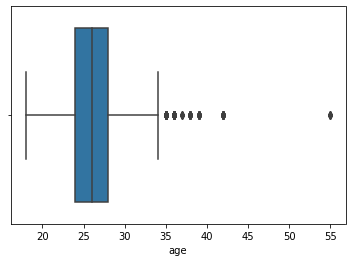

In [100]:
sns.boxplot(df1['age'])

In [97]:
a = (df1['age'] > 35).value_counts()
a


False    8265
True      113
Name: age, dtype: int64

In [106]:
df1.drop(df1[df1['age'] > 35].index, inplace= True)
df1.head()

c:\Users\CHAFFA Michèle\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,age,field_cd,race,imprace,imprelig,from,goal,date,wave_split,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
1,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
2,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
3,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
4,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0


c:\Users\CHAFFA Michèle\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

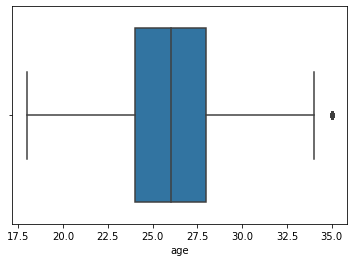

In [107]:
sns.boxplot(df1['age'])

In [108]:
df.drop(df[df['age'] > 35].index, inplace= True)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,wave_split
0,1,1.0,0,1,1,1,10,7,NaN,4,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,B
1,1,1.0,0,1,1,1,10,7,NaN,3,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,B
2,1,1.0,0,1,1,1,10,7,NaN,10,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,B
3,1,1.0,0,1,1,1,10,7,NaN,5,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,B
4,1,1.0,0,1,1,1,10,7,NaN,7,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,B


In [117]:
df1.head()

,gender,age,field_cd,race,imprace,imprelig,from,goal,date,wave_split,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
1,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
2,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
3,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0
4,0,21.0,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,B,15.0,20.0,20.0,15.0,15.0,15.0


In [ ]:
"""ig = go.Figure(
    data = go.Bar(x = df_bar['Attribute'], y = df_bar['Mean for wave 1 to 5'], name = 'Male')
)

fig.add_trace(go.Bar(x = df_bar_f['Attribute'], y = df_bar_f['Mean for wave 1 to 5'], name = 'Female'))

fig.update_layout(title='What do people expect from the opposite sex')

fig.show()
"""

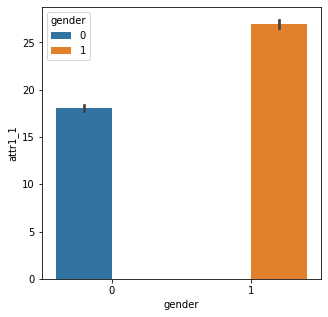

In [122]:
plt.figure(figsize=(5, 5))




